In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [88]:
df = pd.read_csv('/content/sample_data/D3.csv')
print(df)
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M

          X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]


100

In [89]:
X3 = df.values[:,2] # get input values from X2 column
y = df.values[:, 3]  # get output values from Y column
m = len(y) # Number of training examples 
print('X3 = ', X3[: 5]) # Show only first 5 records 
print('y = ', y[: 5]) 


X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


Text(0.5, 1.0, 'Scatter plot of training data for X3')

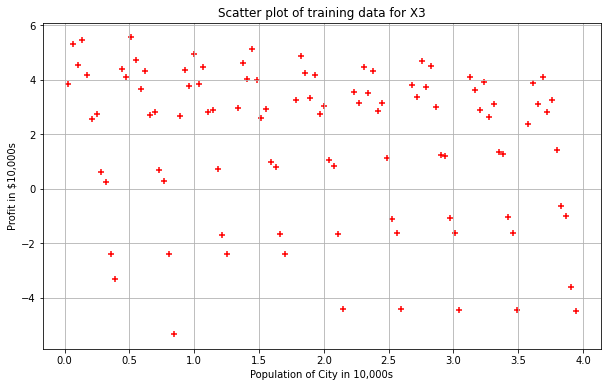

In [90]:
plt.scatter(X3,y, color='red',marker= '+') 
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('Population of City in 10,000s') 
plt.ylabel('Profit in $10,000s') 
plt.title('Scatter plot of training data for X3') 

In [91]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((m, 1)) 
X_0[:5] 
X_3 = X3.reshape(m,1)
X_3[:10]
print('X_3:',X_3)

X_3: [[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]
 [2.68242424]
 [3.13090909]
 [3.57939394]
 [0.02787879]
 [0.47636364]
 [0.92484849]
 [1.37333333]
 [1.82181818]
 [2.27030303]
 [2.71878788]
 [3.16727273]
 [3.61575758]
 [0.06424242]
 [0.51272727]
 [0.96121212]
 [1.40969697]
 [1.85818182]
 [2.30666667]
 [2.75515152]
 [3.20363636]
 [3.65212121]
 [0.10060606]
 [0.54909091]
 [0.99757576]
 [1.44606061]
 [1.89454546]
 [2.3430303 ]
 [2.79151515]
 [3.24      ]
 [3.68848485]
 [0.1369697 ]
 [0.58545455]
 [1.03393939]
 [1.48242424]
 [1.93090909]
 [2.37939394]
 [2.82787879]
 [3.27636364]
 [3.72484848]
 [0.17333333]
 [0.62181818]
 [1.07030303]
 [1.51878788]
 [1.96727273]
 [2.41575758]
 [2.86424242]
 [3.31272727]
 [3.76121212]
 [0.20969697]
 [0.65818182]
 [1.10666667]
 [1.55515151]
 [2.00363636]
 [2.45212121]
 [2.90060606]
 [3.34909091]
 [3.79757576]
 [0.24606061]
 [0.69454545]
 [1.1430303 ]
 [1.59151515]
 [2.04      ]
 [2.48848485]
 [2.9369697 ]
 [3.38545454]
 [3.83393939]
 

In [92]:
# Lets use hstack() function from numpy to stack X_0 and X_2 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X03 = np.hstack((X_0, X_3)) 
X03[:5] 

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [93]:
theta = np.zeros(2) 
theta 

array([0., 0.])

In [94]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [95]:
# Lets compute the cost for theta values 
cost03 = compute_cost(X03, y, theta) 
print('The cost for given values of theta_0 and theta_1 =', cost03) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [96]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
   """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

In [97]:
theta = [0., 0.] 
iterations = 1500; 
alpha = 0.01; 

In [98]:
theta, cost_history03 = gradient_descent(X03, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history03)

Final value of theta = [ 2.78048129 -0.48451631]
cost_history = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


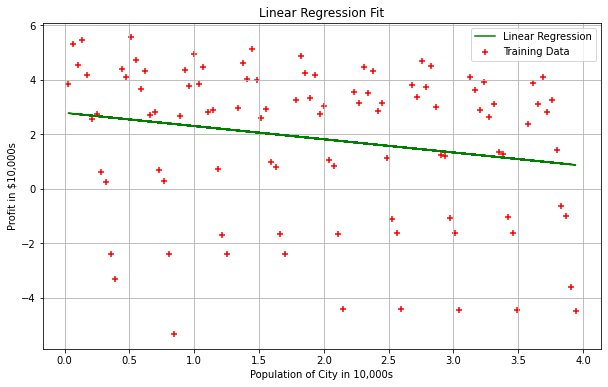

In [99]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X03[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X03[:,1],X03.dot(theta), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6)
plt.grid() 
plt.xlabel('Population of City in 10,000s') 
plt.ylabel('Profit in $10,000s') 
plt.title('Linear Regression Fit') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of gradient descent')

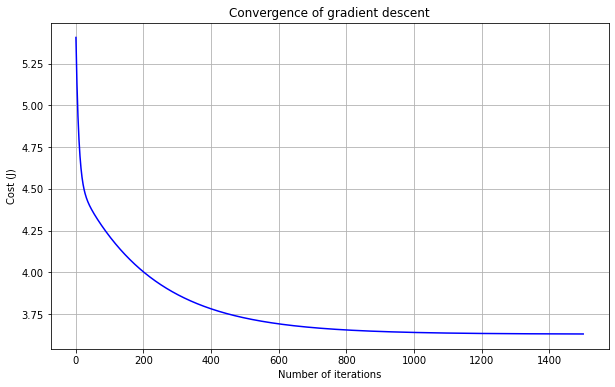

In [100]:
plt.plot(range(1, iterations + 1),cost_history03, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 